# PTEN in Endo and GBM

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re
import sys 

import cptac
import cptac.utils as u

import sys
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsDontMatter\\')
#import cis_functions as f
import plot_utils as p


In [6]:
gbm = cptac.Gbm()

cptac warning: This data is under a publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 1)


In [7]:
endo = cptac.Endometrial()

In [ ]:
ov = cptac.Ovarian()

In [ ]:
b = cptac.Brca()

In [ ]:
l = cptac.Luad()

In [ ]:
h = cptac.Hnscc()

In [5]:
k = cptac.Ccrcc()

In [8]:
gene = 'PTEN'

In [43]:
h = cptac.Hnscc() # 1 level

In [169]:
h_omics_mutations = h.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes=gene, 
                                                omics_genes=gene, mutations_filter=[])
#omics_mutations = h.reduce_multiindex(h_omics_mutations, levels_to_drop = 1)
h_omics_mutations['PTEN_Mutation'].unique()

cptac warning: Unknown mutation type Missense_Mutation. Assigned lowest priority in filtering. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 2)
cptac warning: Unknown mutation type Missense_Mutation. Assigned lowest priority in filtering. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 2)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 176 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 2)


array(['Wildtype_Tumor', 'Wildtype_Normal', 'Missense_Mutation'],
      dtype=object)

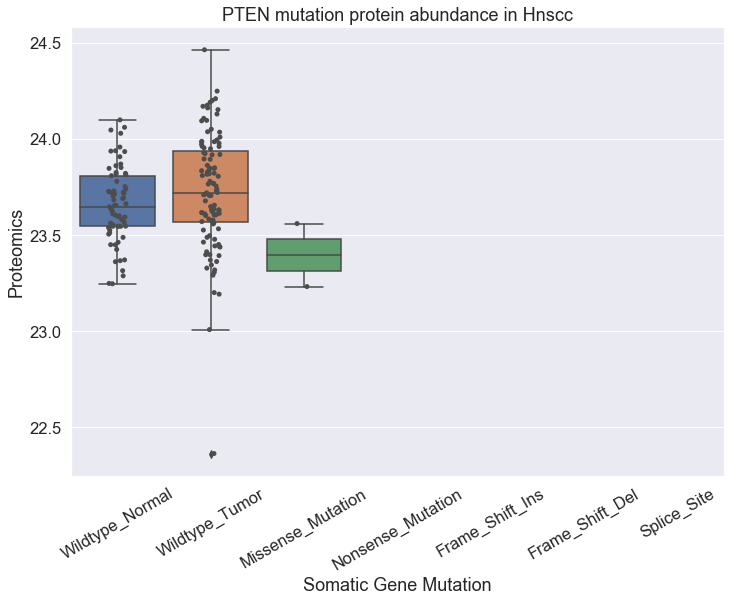

In [170]:
a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=h_omics_mutations, x=gene + "_Mutation",y=gene +"_proteomics", ax = ax, 
                              order=["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation","Nonsense_Mutation",
                                        "Frame_Shift_Ins","Frame_Shift_Del","Splice_Site"]) 
                                        # order parameter is used to reorder the mutation categories 
somatic_boxplot.set_title("PTEN mutation protein abundance in Hnscc")
somatic_boxplot = sns.stripplot(data=h_omics_mutations, x=gene + "_Mutation",y=gene +"_proteomics",jitter=True, 
                                color=".3", order=["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation",
                                                     "Nonsense_Mutation", "Frame_Shift_Ins","Frame_Shift_Del",
                                                     "Splice_Site"])
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
somatic_boxplot.set_xticklabels(somatic_boxplot.get_xticklabels(),rotation=30) # Rotate labels to avoid overlap
plt.show()

cptac warning: Unknown mutation type Missense_Mutation. Assigned lowest priority in filtering. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 2)
cptac warning: Unknown mutation type Missense_Mutation. Assigned lowest priority in filtering. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 2)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 109 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 2)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-02617, C3N-02727 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 2)


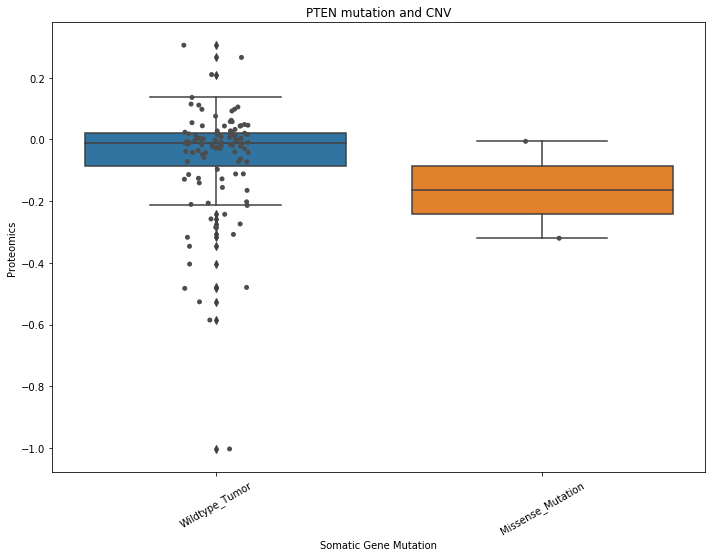

In [87]:
h_cnv = h.join_omics_to_mutations(omics_df_name="CNV", mutations_genes=gene, 
                                                omics_genes=gene, mutations_filter=[])
#h_cnv = h.reduce_multiindex(h_cnv, levels_to_drop = 1)

a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=h_cnv, x=gene + "_Mutation",y=gene +"_CNV", ax = ax)
                     
somatic_boxplot.set_title("PTEN mutation and CNV")
somatic_boxplot = sns.stripplot(data=h_cnv, x=gene + "_Mutation",y=gene +"_CNV",jitter=True, 
                                color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
somatic_boxplot.set_xticklabels(somatic_boxplot.get_xticklabels(),rotation=30) # Rotate labels to avoid overlap
plt.show()

In [171]:
cnv = h.get_CNV()
#cnv =h.reduce_multiindex(cnv, levels_to_drop = 1)
h_cnv = cnv[['PTEN']]
h_cnv

Name,PTEN
Patient_ID,
C3L-00977,0.061917
C3L-00987,-0.284854
C3L-00994,-0.013106
C3L-00995,-0.029976
C3L-00997,-0.140809
...,...
C3N-04277,-0.017048
C3N-04278,-0.002343
C3N-04279,0.105120


Text(0.5, 0, 'CNV')

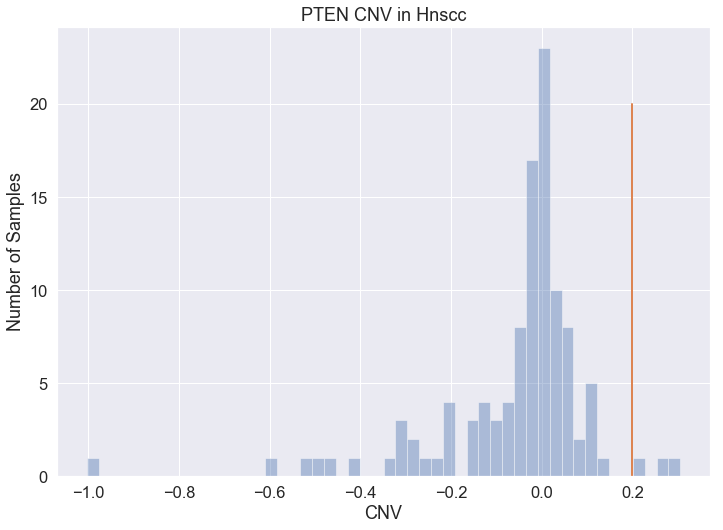

In [174]:
sns.set(font_scale = 1.5)
a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(h_cnv, kde = False, bins = 50)
plt.plot([.2, .2], [20, 0], linewidth=2)
plt.title("PTEN CNV in Hnscc")
plt.ylabel('Number of Samples')
plt.xlabel('CNV')


In [46]:
#l = cptac.Luad()

cptac warning: This data is under a publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 1)


In [78]:
# PTEN gene not found in somatic_mutation data.
'''
l_omics_mutations = l.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes=gene, 
                                                omics_genes=gene, mutations_filter=[])
#l_omics_mutations = l.reduce_multiindex(l_omics_mutations, levels_to_drop = 1)
l_omics_mutations'''

'\nl_omics_mutations = l.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes=gene, \n                                                omics_genes=gene, mutations_filter=[])\n#l_omics_mutations = l.reduce_multiindex(l_omics_mutations, levels_to_drop = 1)\nl_omics_mutations'

In [50]:
k = cptac.Ccrcc() #multi

In [61]:
k_omics_mutations = k.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes=gene, 
                                                omics_genes=gene, mutations_filter=[])
k_omics_mutations = k.reduce_multiindex(k_omics_mutations, levels_to_drop = 1)
k_omics_mutations['PTEN_Mutation'].unique()

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 189 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 2)


array(['Wildtype_Tumor', 'Wildtype_Normal', 'Missense_Mutation',
       'Nonsense_Mutation', 'Splice_Site'], dtype=object)

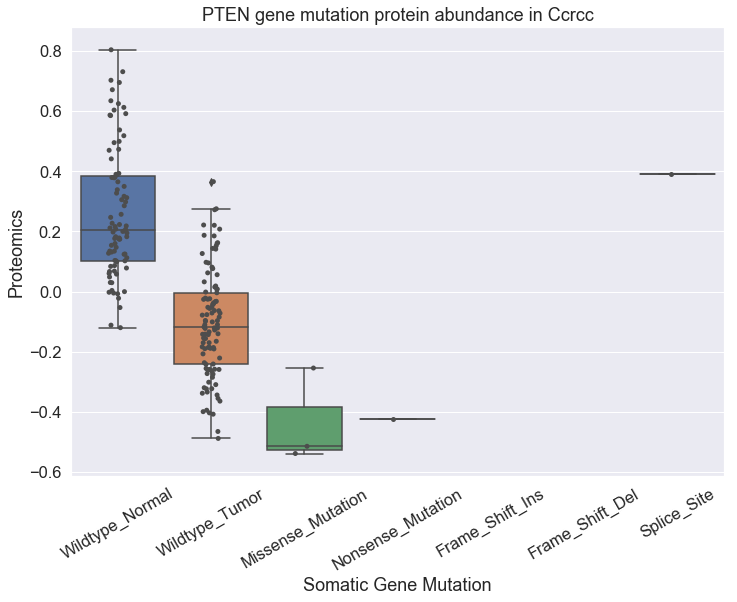

In [178]:
a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=k_omics_mutations, x=gene + "_Mutation",y=gene +"_proteomics", ax = ax, 
                              order=["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation","Nonsense_Mutation",
                                       "Frame_Shift_Ins","Frame_Shift_Del","Splice_Site"]) 
                                        # order parameter is used to reorder the mutation categories 
somatic_boxplot.set_title("PTEN gene mutation protein abundance in Ccrcc")
somatic_boxplot = sns.stripplot(data=k_omics_mutations, x=gene + "_Mutation",y=gene +"_proteomics",jitter=True, 
                                color=".3", order=["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation",
                                                     "Nonsense_Mutation","Frame_Shift_Ins","Frame_Shift_Del",
                                                     "Splice_Site"])
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
somatic_boxplot.set_xticklabels(somatic_boxplot.get_xticklabels(),rotation=30) # Rotate labels to avoid overlap
plt.show()

cptac warning: Due to dropping the specified levels, dataframe now has 36 duplicated column headers. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 2)


Text(0.5, 0, 'CNV')

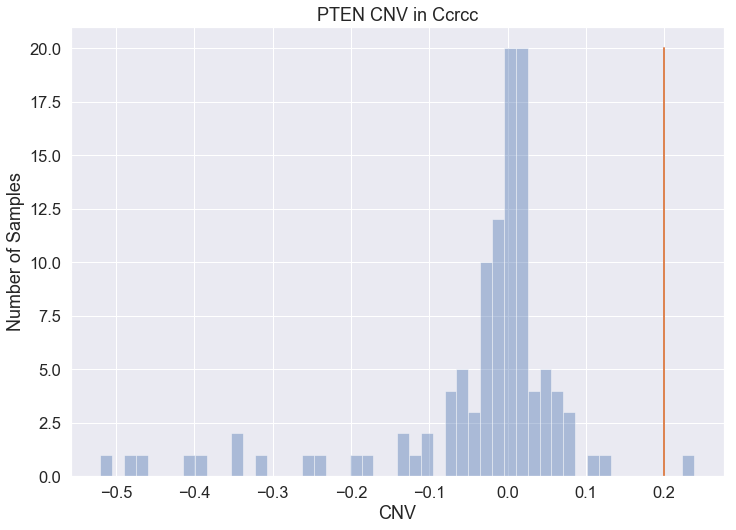

In [179]:
cnv = k.get_CNV()
cnv = k.reduce_multiindex(cnv, levels_to_drop = 1)
k_cnv = cnv[['PTEN']]
k_cnv

sns.set(font_scale = 1.5)
a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(k_cnv, kde = False, bins = 50)
plt.plot([.2, .2], [20, 0], linewidth=2)
plt.title("PTEN CNV in Ccrcc")
plt.ylabel('Number of Samples')
plt.xlabel('CNV')

In [38]:
gbm = cptac.Gbm()

cptac warning: This data is under a publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 1)


In [62]:
omics_mutations = gbm.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes=gene, 
                                                omics_genes=gene, mutations_filter=[])
#omics_mutations = gbm.reduce_multiindex(omics_mutations, levels_to_drop = 1)
omics_mutations['PTEN_Mutation'].unique()

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 82 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 2)


array(['Missense_Mutation', 'Wildtype_Tumor', 'Splice_Site',
       'Frame_Shift_Del', 'In_Frame_Del', 'Nonsense_Mutation',
       'Frame_Shift_Ins', 'Wildtype_Normal'], dtype=object)

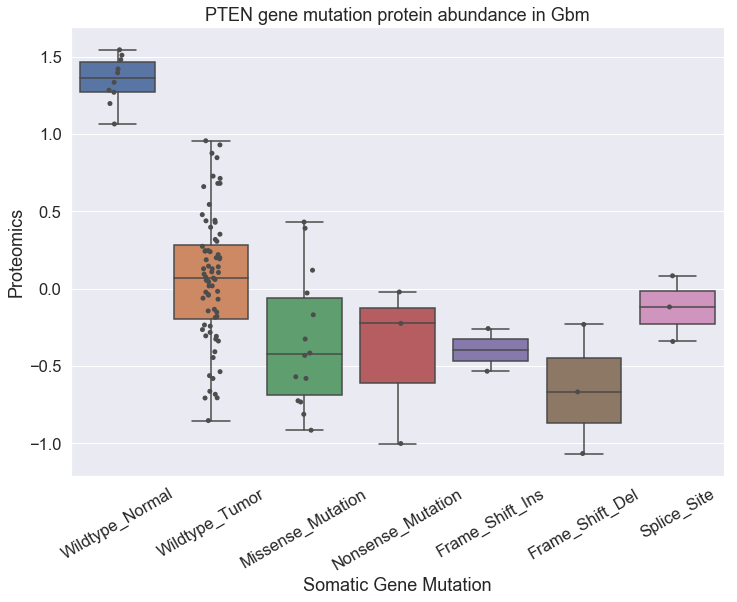

In [180]:
a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=omics_mutations, x=gene + "_Mutation",y=gene +"_proteomics", ax = ax, 
                              order=["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation","Nonsense_Mutation",
                                      "Frame_Shift_Ins","Frame_Shift_Del","Splice_Site"]) 
                                        # order parameter is used to reorder the mutation categories 
somatic_boxplot.set_title("PTEN gene mutation protein abundance in Gbm")
somatic_boxplot = sns.stripplot(data=omics_mutations, x=gene + "_Mutation",y=gene +"_proteomics",jitter=True, 
                                color=".3", order=["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation",
                                 "Nonsense_Mutation","Frame_Shift_Ins","Frame_Shift_Del", "Splice_Site"])
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
somatic_boxplot.set_xticklabels(somatic_boxplot.get_xticklabels(),rotation=30) # Rotate labels to avoid overlap
plt.show()

Text(0.5, 0, 'CNV')

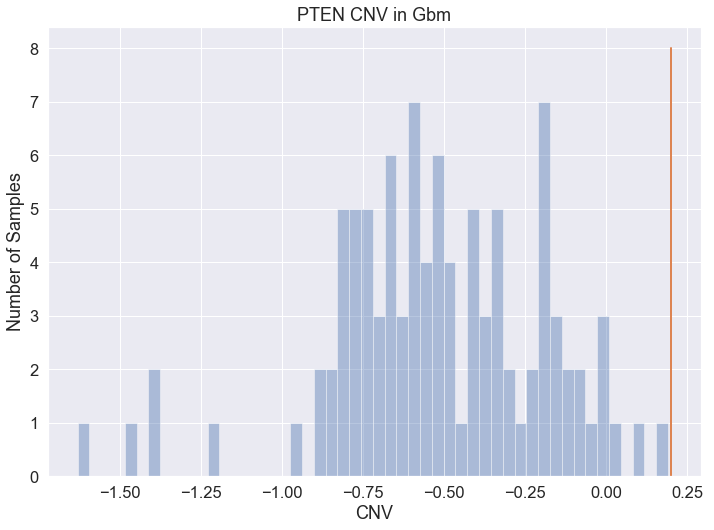

In [181]:
cnv = gbm.get_CNV()
#cnv = gbm.reduce_multiindex(cnv, levels_to_drop = 1)
g_cnv = cnv[['PTEN']]

sns.set(font_scale = 1.5)
a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(g_cnv, kde = False, bins = 50)
plt.plot([.2, .2], [8, 0], linewidth=2)
plt.title("PTEN CNV in Gbm")
plt.ylabel('Number of Samples')
plt.xlabel('CNV')

Endometrial

In [132]:
e = cptac.Endometrial()

In [63]:
e_omics_mutations = endo.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes=gene, 
                                                omics_genes=gene, mutations_filter=[])
e_omics_mutations['PTEN_Mutation'].unique()

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 69 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 2)


array(['Nonsense_Mutation', 'Wildtype_Normal', 'Missense_Mutation',
       'Wildtype_Tumor', 'Frame_Shift_Ins', 'Frame_Shift_Del',
       'Splice_Site'], dtype=object)

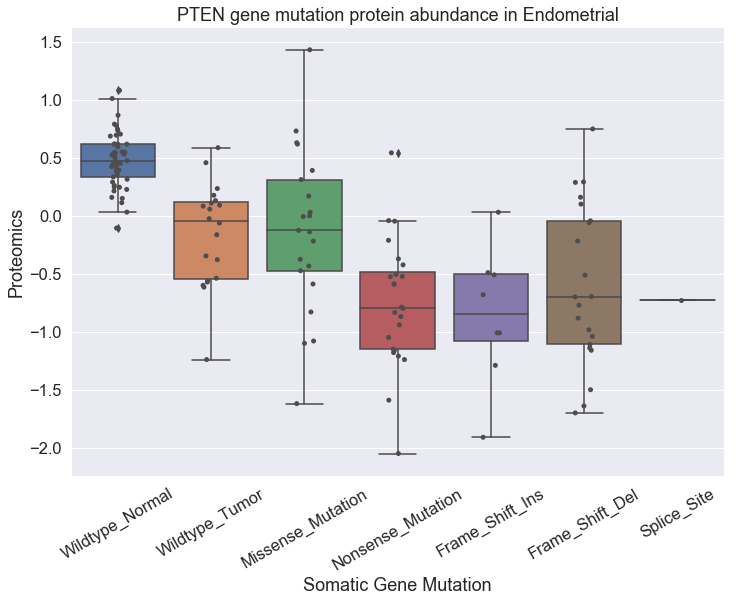

In [182]:
a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=e_omics_mutations, x=gene + "_Mutation",y=gene +"_proteomics", ax = ax, 
                              order=["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation","Nonsense_Mutation",
                                       "Frame_Shift_Ins","Frame_Shift_Del","Splice_Site"]) 
                                        # order parameter is used to reorder the mutation categories 
somatic_boxplot.set_title("PTEN gene mutation protein abundance in Endometrial")
somatic_boxplot = sns.stripplot(data=e_omics_mutations, x=gene + "_Mutation",y=gene +"_proteomics",jitter=True, 
                                color=".3", order=["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation",
                                                     "Nonsense_Mutation","Frame_Shift_Ins","Frame_Shift_Del",
                                                     "Splice_Site"])
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
somatic_boxplot.set_xticklabels(somatic_boxplot.get_xticklabels(),rotation=30) # Rotate labels to avoid overlap
plt.show()

Text(0.5, 0, 'CNV')

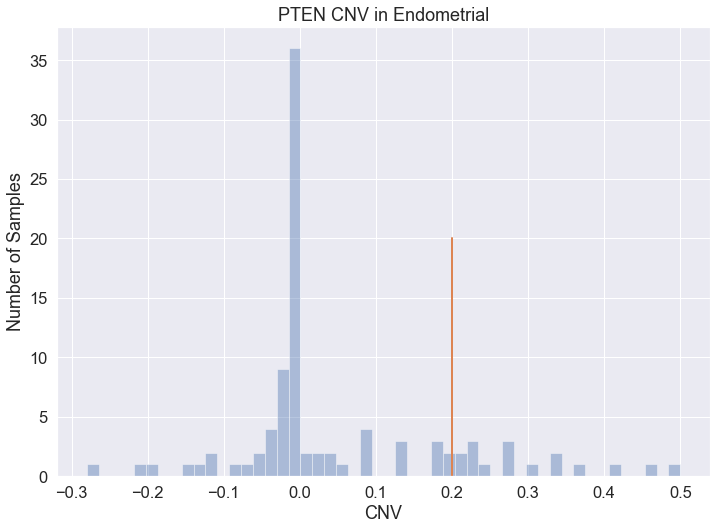

In [184]:
cnv = e.get_CNV()
#cnv = e.reduce_multiindex(cnv, levels_to_drop = 1)
e_cnv = cnv[['PTEN']]
e_cnv

sns.set(font_scale = 1.5)
a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(e_cnv, kde = False, bins = 50)
plt.plot([.2, .2], [20, 0], linewidth=2)
plt.title("PTEN CNV in Endometrial")
plt.ylabel('Number of Samples')
plt.xlabel('CNV')

Ovarian

In [12]:
ov = cptac.Ovarian() #multiindex

In [65]:
ov_omics_mutations = ov.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes=gene, 
                                                omics_genes=gene, mutations_filter=[])
ov_omics_mutations = ov.reduce_multiindex(ov_omics_mutations, levels_to_drop = 1)
ov_omics_mutations['PTEN_Mutation'].unique()

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 99 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 2)


array(['Wildtype_Tumor', 'Wildtype_Normal', 'Missense_Mutation',
       'Frame_Shift_Del', 'Nonsense_Mutation'], dtype=object)

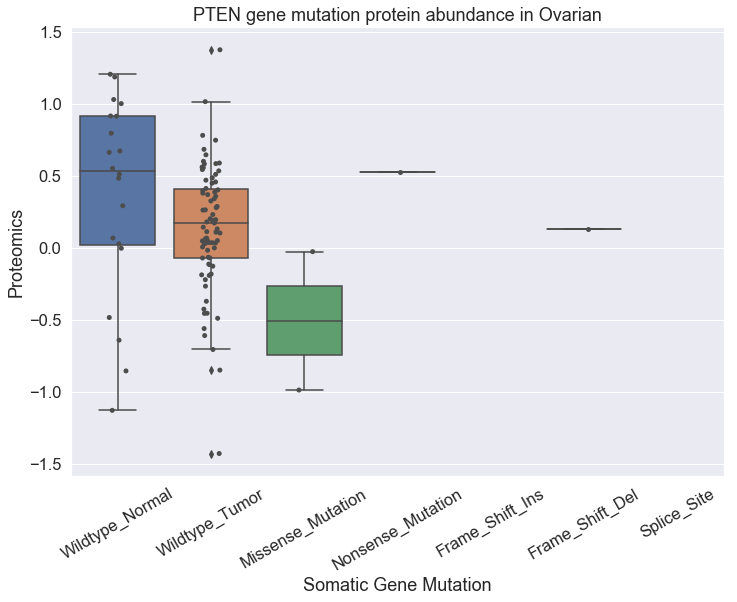

In [185]:
a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=ov_omics_mutations, x=gene + "_Mutation",y=gene +"_proteomics", ax = ax,
                              order=["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation","Nonsense_Mutation",
                                       "Frame_Shift_Ins","Frame_Shift_Del","Splice_Site"]) 
                                        # order parameter is used to reorder the mutation categories 
somatic_boxplot.set_title("PTEN gene mutation protein abundance in Ovarian")
somatic_boxplot = sns.stripplot(data=ov_omics_mutations, x=gene + "_Mutation",y=gene +"_proteomics",jitter=True, 
                                color=".3", order=["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation",
                                                     "Nonsense_Mutation","Frame_Shift_Ins","Frame_Shift_Del",
                                                     "Splice_Site"])
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
somatic_boxplot.set_xticklabels(somatic_boxplot.get_xticklabels(),rotation=30) # Rotate labels to avoid overlap
plt.show()

Text(0.5, 0, 'CNV')

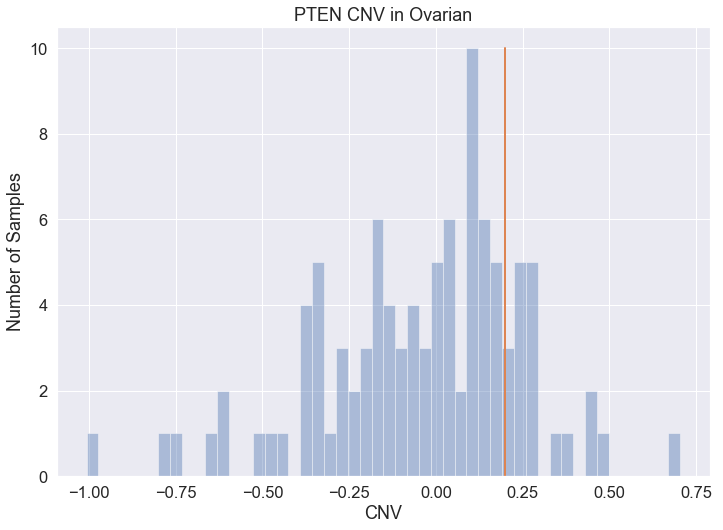

In [186]:
cnv = ov.get_CNV()
#cnv = ov.reduce_multiindex(cnv, levels_to_drop = 1)
ov_cnv = cnv[['PTEN']]
ov_cnv

sns.set(font_scale = 1.5)
a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(ov_cnv, kde = False, bins = 50)
plt.plot([.2, .2], [10, 0], linewidth=2)
plt.title("PTEN CNV in Ovarian")
plt.ylabel('Number of Samples')
plt.xlabel('CNV')

In [29]:
b = cptac.Brca() # multiindex

In [66]:
b_omics_mutations = b.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes=gene, 
                                                omics_genes=gene, mutations_filter=[])
b_omics_mutations = b.reduce_multiindex(b_omics_mutations, levels_to_drop = 1)
b_omics_mutations['PTEN_Mutation'].unique()


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 113 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 2)


array(['Wildtype_Tumor', 'Frame_Shift_Del', 'Missense_Mutation',
       'Splice_Site', 'Nonsense_Mutation'], dtype=object)

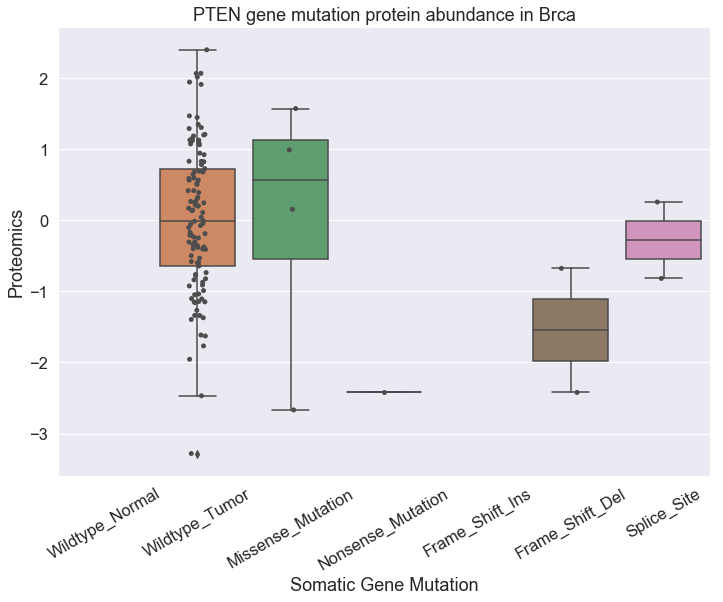

In [187]:
a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=b_omics_mutations, x=gene + "_Mutation",y=gene +"_proteomics", ax = ax,
                              order=["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation","Nonsense_Mutation",
                                       "Frame_Shift_Ins","Frame_Shift_Del","Splice_Site"]) 
                                        # order parameter is used to reorder the mutation categories 
somatic_boxplot.set_title("PTEN gene mutation protein abundance in Brca")
somatic_boxplot = sns.stripplot(data=b_omics_mutations, x=gene + "_Mutation",y=gene +"_proteomics",jitter=True, 
                                color=".3", order=["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation",
                                                     "Nonsense_Mutation","Frame_Shift_Ins","Frame_Shift_Del",
                                                     "Splice_Site"])
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
somatic_boxplot.set_xticklabels(somatic_boxplot.get_xticklabels(),rotation=30) # Rotate labels to avoid overlap
plt.show()

cptac warning: Due to dropping the specified levels, dataframe now has 1146 duplicated column headers. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 2)


Text(0.5, 0, 'CNV')

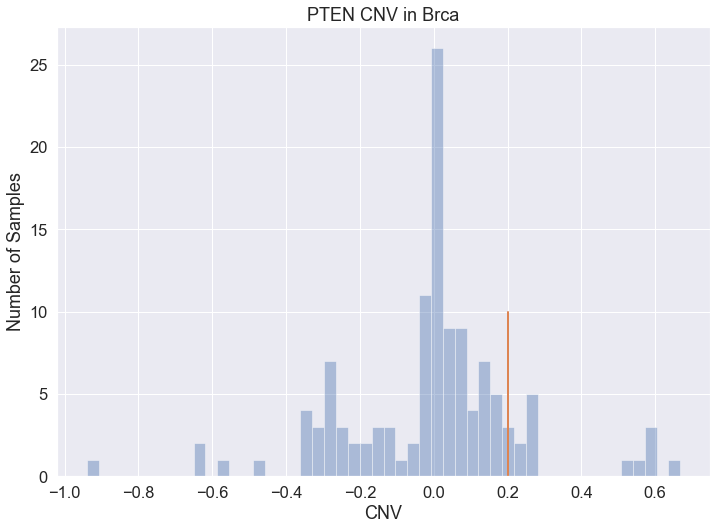

In [188]:
cnv = b.get_CNV()
cnv = b.reduce_multiindex(cnv, levels_to_drop = 1)
b_cnv = cnv[['PTEN']]
b_cnv

sns.set(font_scale = 1.5)
a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(b_cnv, kde = False, bins = 50)
plt.plot([.2, .2], [10, 0], linewidth=2)
plt.title("PTEN CNV in Brca")
plt.ylabel('Number of Samples')
plt.xlabel('CNV')

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 113 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 2)


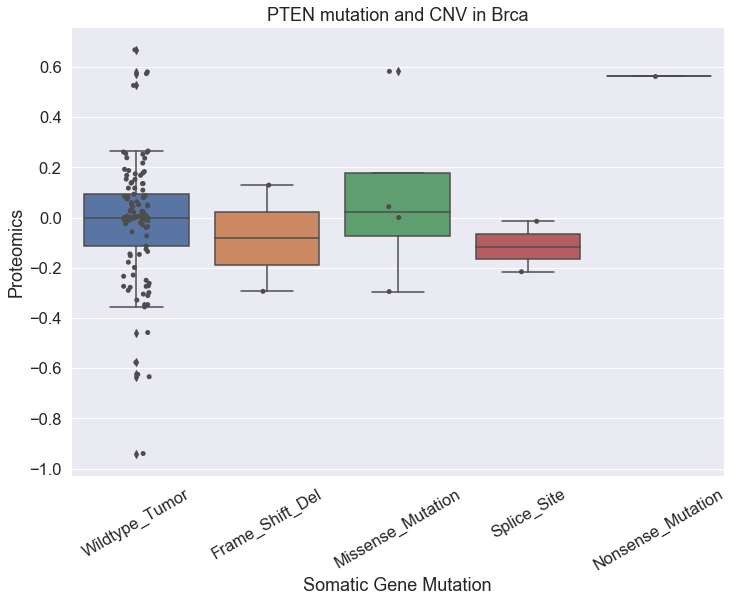

In [189]:
b_cnv = b.join_omics_to_mutations(omics_df_name="CNV", mutations_genes=gene, 
                                                omics_genes=gene, mutations_filter=[])
b_cnv = b.reduce_multiindex(b_cnv, levels_to_drop = 1)

a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=b_cnv, x=gene + "_Mutation",y=gene +"_CNV", ax = ax)
                     
somatic_boxplot.set_title("PTEN mutation and CNV in Brca")
somatic_boxplot = sns.stripplot(data=b_cnv, x=gene + "_Mutation",y=gene +"_CNV",jitter=True, 
                                color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
somatic_boxplot.set_xticklabels(somatic_boxplot.get_xticklabels(),rotation=30) # Rotate labels to avoid overlap
plt.show()

In [3]:
c = cptac.Colon()

In [9]:
gene = 'PTEN'
b_omics_mutations = c.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes=gene, 
                                                omics_genes=gene, mutations_filter=[])
#b_omics_mutations = c.reduce_multiindex(b_omics_mutations, levels_to_drop = 1)
b_omics_mutations['PTEN_Mutation'].value_counts()


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 201 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 3)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 3)


Wildtype_Tumor         101
Wildtype_Normal        100
nonsynonymous SNV        5
frameshift deletion      1
Name: PTEN_Mutation, dtype: int64